In [15]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e440821e-4d95-4ff3-a1c2-c80ce4324287',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# Open Anaconda Prompt and put in "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" to pull data

In [16]:
import pandas as pd

#Allows you to see all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
#Normalizes the data dn makes it pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\John Nguyen\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945159e+07,1.945159e+07,False,NaN,1,NaN,NaN,None,2023-08-08T19:13:00.000Z,29923.717528,1.595848e+10,22.0560,0.411013,2.919405,2.337956,-1.012008,13.235076,7.975620,5.820640e+11,49.0417,6.283981e+11,None,2023-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:15:16.949774
1,1027,Ethereum,ETH,ethereum,7223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201592e+08,1.201592e+08,True,NaN,2,NaN,NaN,None,2023-08-08T19:13:00.000Z,1862.597090,5.418560e+09,-4.7147,0.450091,2.349897,0.631086,-0.113422,1.502030,0.523034,2.238082e+11,18.8499,2.238082e+11,None,2023-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:15:16.949774
2,825,Tether USDt,USDT,tether,59130,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.357864e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-08T19:13:00.000Z,1.000037,2.417312e+10,4.0630,0.018454,0.121852,0.070248,-0.023019,0.022006,-0.081416,8.358172e+10,7.0417,8.668745e+10,None,2023-08-08T19:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 19:15:16.949774
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538537e+08,1.538537e+08,False,NaN,4,NaN,NaN,None,2023-08-08T19:13:00.000Z,246.759573,4.771107e+08,12.6295,0.614835,2.279973,0.259491,5.253475,-5.249261,-21.472702,3.796486e+10,3.1975,3.796486e+10,None,2023-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:15:16.949774
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.274129e+10,9.998854e+10,False,NaN,5,NaN,NaN,None,2023-08-08T19:13:00.000Z,0.637575,1.225345e+09,-12.7947,-0.082955,3.829309,-8.854234,35.805332,19.673070,48.937825,3.362650e+10,2.8321,6.375745e+10,None,2023-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:15:16.949774
5,3408,USD Coin,USDC,usd-coin,13548,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.619221e+10,2.619221e+10,False,NaN,6,NaN,NaN,None,2023-08-08T19:13:00.000Z,1.000537,3.176757e+09,11.2816,-0.001747,0.050070,0.050795,0.047109,0.058818,0.037358,2.620628e+10,2.2080,2.620628e+10,None,2023-08-08T19:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 19:15:16.949774
6,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.502769e+10,3.604578e+10,False,NaN,7,NaN,NaN,None,2023-08-08T19:13:00.000Z,0.300832,2.993993e+08,18.1457,0.173491,4.474862,-1.890636,5.695884,-0.407176,-18.671440,1.053745e+10,0.8878,1.353744e+10,None,2023-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:15:16.949774
7,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405091e+11,1.405091e+11,True,NaN,8,NaN,NaN,None,2023-08-08T19:13:00.000Z,0.074991,2.962871e+08,-17.2557,-0.139258,2.500928,-2.871958,14.391365,9.242773,2.272784,1.053696e+10,0.8875,1.053696e+10,None,2023-08-08T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:15:16.949774
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.057469e+08,5

In [52]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e440821e-4d95-4ff3-a1c2-c80ce4324287',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    
    
    # Use this if you want to create a csv and append data to it
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'C:\Users\John Nguyen\OneDrive\Desktop\Python\API\API.csv'):
        #df.to_csv(r'C:\Users\John Nguyen\OneDrive\Desktop\Python\API\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\John Nguyen\OneDrive\Desktop\Python\API\API.csv', mode='a', header=False)
    

In [53]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 min
exit()

C:\Users\John Nguyen\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\conda_tmp\ipykernel_20016\3371672238.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\John Nguyen\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\conda_tmp\ipykernel_20016\3371672238.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\John Nguyen\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\conda_tmp\ipykernel_20016\3371672238.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\John Nguyen\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\conda_tmp\ipykernel_20016\3371672238.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\John Nguyen\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\conda_tmp\ipykernel_20016\3371672238.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


KeyboardInterrupt: 

In [26]:
df72 =  pd.read_csv(r'C:\Users\John Nguyen\OneDrive\Desktop\Python\API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.945159e+07,1.945159e+07,False,NaN,1,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,29868.056830,1.609820e+10,21.6594,0.074739,2.809304,2.186834,-1.311785,13.012111,7.723377,5.809813e+11,49.0447,6.272292e+11,NaN,2023-08-08T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:44:26.575655
1,1,1027,Ethereum,ETH,ethereum,7223,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201592e+08,1.201592e+08,True,NaN,2,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,1859.429235,5.471943e+09,-4.7087,-0.207503,2.269379,0.573219,-0.397943,1.421398,0.428407,2.234276e+11,18.8605,2.234276e+11,NaN,2023-08-08T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:44:26.575655
2,2,825,Tether USDt,USDT,tether,59139,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.357864e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,0.999851,2.431136e+10,3.7516,0.021618,0.114992,0.025182,-0.043832,-0.001526,-0.081323,8.356622e+10,7.0545,8.667138e+10,NaN,2023-08-08T19:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 19:44:26.575655
3,3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538537e+08,1.538537e+08,False,NaN,4,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,246.368053,4.800179e+08,13.6718,-0.283505,2.219242,-0.057161,4.973718,-5.238239,-21.742608,3.790463e+10,3.1997,3.790463e+10,NaN,2023-08-08T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:44:26.575655
4,4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.274129e+10,9.998854e+10,False,NaN,5,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,0.636171,1.229462e+09,-12.7659,-0.482217,3.529988,-9.150340,35.461358,19.505504,48.289979,3.355248e+10,2.8323,6.361711e+10,NaN,2023-08-08T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:44:26.575655
5,5,3408,USD Coin,USDC,usd-coin,13549,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.619221e+10,2.619221e+10,False,NaN,6,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,1.000219,3.190278e+09,10.3872,0.001706,0.027820,0.005614,0.026035,0.019264,0.019867,2.619794e+10,2.2116,2.619794e+10,NaN,2023-08-08T19:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 19:44:26.575655
6,6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.405091e+11,1.405091e+11,True,NaN,7,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,0.074807,2.967228e+08,-17.5435,-0.400147,2.278110,-3.294029,14.119757,9.154396,1.565784,1.051105e+10,0.8873,1.051105e+10,NaN,2023-08-08T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:44:26.575655
7,7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.502769e+10,3.604578e+10,False,NaN,8,NaN,NaN,NaN,2023-08-08T19:42:00.000Z,0.300008,3.004731e+08,17.7151,-0.333587,4.255431,-2.113872,5.313508,-0.279649,-19.131842,1.050858e+10,0.8871,1.350035e+10,NaN,2023-08-08T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:44:26.575655
8,8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",N

In [56]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19451593.00000,19451593.00000,False,NaN,1,NaN,NaN,None,2023-08-08T19:43:00.000Z,29870.68766,16116901557.08574,21.69590,0.07596,2.81636,2.26167,-1.29844,13.01312,7.72856,581032459029.86255,49.04900,627284440900.40002,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
1,1027,Ethereum,ETH,ethereum,7223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120159238.27993,120159238.27993,True,NaN,2,NaN,NaN,None,2023-08-08T19:43:00.000Z,1859.65482,5471684453.78731,-4.78710,-0.20050,2.28201,0.63518,-0.38796,1.42345,0.44248,223454706968.74344,18.86280,223454706968.73999,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
2,825,Tether USDt,USDT,tether,59139,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83578639639.68036,86684257831.30505,True,NaN,3,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.99978,24320976522.59199,3.77060,0.01877,0.10420,0.02575,-0.02619,-0.01076,-0.09222,83560401713.98099,7.05400,86665342220.09000,None,2023-08-08T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 19:45:26.996488
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153853663.18803,153853663.18803,False,NaN,4,NaN,NaN,None,2023-08-08T19:43:00.000Z,246.37756,480498895.99030,13.60430,-0.23974,2.24050,-0.00376,4.96078,-5.28989,-21.74031,37906090343.29652,3.19980,37906090343.30000,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52741286353.00000,99988538151.00000,False,NaN,5,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.63621,1229168794.05138,-12.80650,-0.39173,3.54680,-9.04675,35.40953,19.40618,48.27660,33554414372.32283,2.83250,63620773577.16000,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
5,3408,USD Coin,USDC,usd-coin,13549,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26192212830.87538,26192212830.87538,False,NaN,6,NaN,NaN,None,2023-08-08T19:43:00.000Z,1.00021,3191207089.69609,10.30740,0.00644,0.02409,0.01573,0.03525,0.02347,0.02322,26197703978.35037,2.21150,26197703978.35000,None,2023-08-08T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 19:45:26.996488
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140509066383.70523,140509066383.70523,True,NaN,7,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.07481,296804819.50207,-17.51070,-0.36982,2.28757,-3.21865,14.10592,9.11620,1.60533,10510791760.67913,0.88730,10510791760.68000,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35027690391.06200,36045784123.04600,False,NaN,8,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.29994,300461411.01910,17.62040,-0.31355,4.23209,-2.07069,5.27508,-0.29576,-19.10965,10506167419.70663,0.88690,13497251134.99000,None,2023-08-08T19:43:00.000Z,NaN

In [54]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [55]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19451593.00000,19451593.00000,False,NaN,1,NaN,NaN,None,2023-08-08T19:43:00.000Z,29870.68766,16116901557.08574,21.69590,0.07596,2.81636,2.26167,-1.29844,13.01312,7.72856,581032459029.86255,49.04900,627284440900.40002,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
1,1027,Ethereum,ETH,ethereum,7223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120159238.27993,120159238.27993,True,NaN,2,NaN,NaN,None,2023-08-08T19:43:00.000Z,1859.65482,5471684453.78731,-4.78710,-0.20050,2.28201,0.63518,-0.38796,1.42345,0.44248,223454706968.74344,18.86280,223454706968.73999,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
2,825,Tether USDt,USDT,tether,59139,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83578639639.68036,86684257831.30505,True,NaN,3,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.99978,24320976522.59199,3.77060,0.01877,0.10420,0.02575,-0.02619,-0.01076,-0.09222,83560401713.98099,7.05400,86665342220.09000,None,2023-08-08T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 19:45:26.996488
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153853663.18803,153853663.18803,False,NaN,4,NaN,NaN,None,2023-08-08T19:43:00.000Z,246.37756,480498895.99030,13.60430,-0.23974,2.24050,-0.00376,4.96078,-5.28989,-21.74031,37906090343.29652,3.19980,37906090343.30000,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52741286353.00000,99988538151.00000,False,NaN,5,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.63621,1229168794.05138,-12.80650,-0.39173,3.54680,-9.04675,35.40953,19.40618,48.27660,33554414372.32283,2.83250,63620773577.16000,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
5,3408,USD Coin,USDC,usd-coin,13549,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26192212830.87538,26192212830.87538,False,NaN,6,NaN,NaN,None,2023-08-08T19:43:00.000Z,1.00021,3191207089.69609,10.30740,0.00644,0.02409,0.01573,0.03525,0.02347,0.02322,26197703978.35037,2.21150,26197703978.35000,None,2023-08-08T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 19:45:26.996488
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140509066383.70523,140509066383.70523,True,NaN,7,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.07481,296804819.50207,-17.51070,-0.36982,2.28757,-3.21865,14.10592,9.11620,1.60533,10510791760.67913,0.88730,10510791760.68000,None,2023-08-08T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 19:45:26.996488
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35027690391.06200,36045784123.04600,False,NaN,8,NaN,NaN,None,2023-08-08T19:43:00.000Z,0.29994,300461411.01910,17.62040,-0.31355,4.23209,-2.07069,5.27508,-0.29576,-19.10965,10506167419.70663,0.88690,13497251134.99000,None,2023-08-08T19:43:00.000Z,NaN

In [57]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08431,2.82388,2.45797,-1.07733,13.20798,7.66495
Ethereum,-0.05982,2.13019,0.57093,-0.48972,1.53185,0.34200
Tether USDt,0.02106,0.11612,0.05295,-0.01366,0.01776,-0.06584
BNB,-0.11104,2.10607,-0.00968,4.95659,-5.17744,-21.84371
XRP,0.11923,3.69417,-8.67774,35.79102,19.00401,47.98548
USD Coin,0.00142,0.02532,0.03019,0.03003,0.03635,0.02723
Dogecoin,-0.20966,2.11152,-3.14977,14.15111,9.28312,1.71604
Cardano,-0.21691,4.03271,-2.01928,5.23501,-0.42025,-19.00963
Solana,-0.41048,7.17159,4.22740,15.32985,40.27393,16.45074


In [58]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.08431
             quote.USD.percent_change_24h     2.82388
             quote.USD.percent_change_7d      2.45797
             quote.USD.percent_change_30d    -1.07733
             quote.USD.percent_change_60d    13.20798
             quote.USD.percent_change_90d     7.66495
Ethereum     quote.USD.percent_change_1h     -0.05982
             quote.USD.percent_change_24h     2.13019
             quote.USD.percent_change_7d      0.57093
             quote.USD.percent_change_30d    -0.48972
             quote.USD.percent_change_60d     1.53185
             quote.USD.percent_change_90d     0.34200
Tether USDt  quote.USD.percent_change_1h      0.02106
             quote.USD.percent_change_24h     0.11612
             quote.USD.percent_change_7d      0.05295
             quote.USD.percent_change_30d    -0.01366
             quote.USD.percent_change_60d     0.01776
             quote.USD.percent_change_90

In [59]:
type(df4)

pandas.core.series.Series

In [60]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.08431
            quote.USD.percent_change_24h   2.82388
            quote.USD.percent_change_7d    2.45797
            quote.USD.percent_change_30d  -1.07733
            quote.USD.percent_change_60d  13.20798
            quote.USD.percent_change_90d   7.66495
Ethereum    quote.USD.percent_change_1h   -0.05982
            quote.USD.percent_change_24h   2.13019
            quote.USD.percent_change_7d    0.57093
            quote.USD.percent_change_30d  -0.48972
            quote.USD.percent_change_60d   1.53185
            quote.USD.percent_change_90d   0.34200
Tether USDt quote.USD.percent_change_1h    0.02106
            quote.USD.percent_change_24h   0.11612
            quote.USD.percent_change_7d    0.05295
            quote.USD.percent_change_30d  -0.01366
            quote.USD.percent_change_60d   0.01776
            quote.USD.percent_change_90d  -0.06584
BNB         quote.USD.percent_change_1h   -0.11104
            quote.USD.percent_change_24h   2.10607
            quote.USD.percent_change_7d   -0.00968
            quote.USD.percent_change_30d   4.95659
            quote.USD.percent_change_60d  -5.17744
            quote.USD.percent_change_90d -21.84371
XRP         quote.USD.percent_change_1h    0.11923
            quote.USD.percent_change_24h   3.69417
            quote.USD.percent_change_7d   -8.67774
            quote.USD.percent_change_30d  35.79102
            quote.USD.percent_change_60d  19.00401
            quote.USD.percent_change_90d  47.98548
USD Coin    quote.USD.percent_change_1h    0.00142
            quote.USD.percent_change_24h   0.02532
            quote.USD.percent_change_7d    0.03019
            quote.USD.percent_change_30d   0.03003
            quote.USD.percent_change_60d   0.03635
            quote.USD.percent_change_90d   0.02723
Dogecoin    quote.USD.percent_change_1h   -0.20966
            quote.USD.percent_change_24h   2.11152
            quote.USD.percent_change_7d   -3.14977
            quote.USD.percent_change_30d  14.15111
            quote.USD.percent_change_60d   9.28312
            quote.USD.percent_change_90d   1.71604
Cardano     quote.USD.percent_change_1h   -0.21691
            quote.USD.percent_change_24h   4.03271
            quote.USD.percent_change_7d   -2.01928
            quote.USD.percent_change_30d   5.23501
            quote.USD.percent_change_60d  -0.42025
            quote.USD.percent_change_90d -19.00963
Solana      quote.USD.percent_change_1h   -0.41048
            quote.USD.percent_change_24h   7.17159
            quote.USD.percent_change_7d    4.22740
            quote.USD.percent_change_30d  15.32985
            quote.USD.percent_change_60d  40.27393
            quote.USD.percent_change_90d  16.45074
TRON        quote.USD.percent_change_1h   -0.05327
            quote.USD.percent_change_24h   0.32196
            quote.USD.percent_change_7d   -1.93447
            quote.USD.percent_change_30d  -1.81083
            quote.USD.percent_change_60d   6.18493
            quote.USD.percent_change_90d  10.60339
Polygon     quote.USD.percent_change_1h    0.06386
            quote.USD.percent_change_24h   4.84855
            quote.USD.percent_change_7d    0.61692
            quote.USD.percent_change_30d  -0.09879
            quote.USD.percent_change_60d  -5.93257
            quote.USD.percent_change_90d -21.27275
Litecoin    quote.USD.percent_change_1h   -0.18347
            quote.USD.percent_change_24h   3.25456
            quote.USD.percent_change_7d   -9.61271
            quote.USD.percent_change_30d -12.76373
            quote.USD.percent_change_60d  -5.02019
            quote.USD.percent_change_90d   3.60132
Polkadot    quote.USD.percent_change_1h   -0.16959
            quote.USD.percent_change_24h   2.23602
            quote.USD.percent_change_7d   -1.53586
            quote.USD.percent_change_30d  -0.50736
            quote.USD.percent_change_60d   2.03550
            quo

In [61]:
df5.count()

values    90
dtype: int64

In [62]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08431
1,Bitcoin,quote.USD.percent_change_24h,2.82388
2,Bitcoin,quote.USD.percent_change_7d,2.45797
3,Bitcoin,quote.USD.percent_change_30d,-1.07733
4,Bitcoin,quote.USD.percent_change_60d,13.20798
5,Bitcoin,quote.USD.percent_change_90d,7.66495
6,Ethereum,quote.USD.percent_change_1h,-0.05982
7,Ethereum,quote.USD.percent_change_24h,2.13019
8,Ethereum,quote.USD.percent_change_7d,0.57093
9,Ethereum,quote.USD.percent_change_30d,-0.48972


In [63]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08431
1,Bitcoin,quote.USD.percent_change_24h,2.82388
2,Bitcoin,quote.USD.percent_change_7d,2.45797
3,Bitcoin,quote.USD.percent_change_30d,-1.07733
4,Bitcoin,quote.USD.percent_change_60d,13.20798
5,Bitcoin,quote.USD.percent_change_90d,7.66495
6,Ethereum,quote.USD.percent_change_1h,-0.05982
7,Ethereum,quote.USD.percent_change_24h,2.13019
8,Ethereum,quote.USD.percent_change_7d,0.57093
9,Ethereum,quote.USD.percent_change_30d,-0.48972


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.08431
1,Bitcoin,24h,2.82388
2,Bitcoin,7d,2.45797
3,Bitcoin,30d,-1.07733
4,Bitcoin,60d,13.20798
5,Bitcoin,90d,7.66495
6,Ethereum,1h,-0.05982
7,Ethereum,24h,2.13019
8,Ethereum,7d,0.57093
9,Ethereum,30d,-0.48972


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

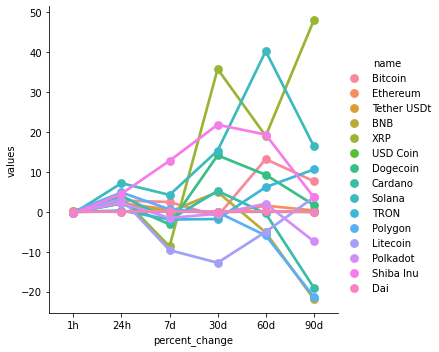

In [65]:
sns.catplot(x='percent_change', y='values', hue='name', data = df7, kind='point')

In [75]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29870.68766,2023-08-08 19:45:26.996488
15,Bitcoin,29925.28569,2023-08-08 20:17:40.567594
30,Bitcoin,29921.87384,2023-08-08 20:18:40.882449
45,Bitcoin,29925.03563,2023-08-08 20:19:41.093540
60,Bitcoin,29955.22803,2023-08-08 20:20:41.311434
75,Bitcoin,29935.97649,2023-08-08 20:21:41.604589


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

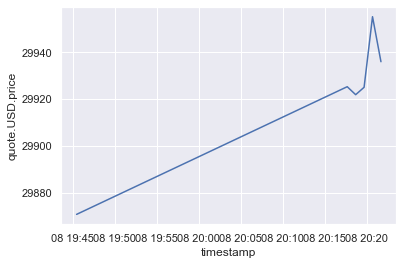

In [76]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)